In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import squarify
import itertools
from pylab import *
import matplotlib.gridspec as gridspec


Sources
https://realpython.com/python-matplotlib-guide/
https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39


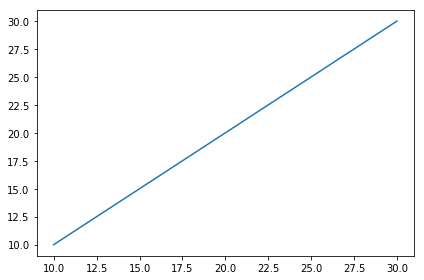

In [53]:
%matplotlib inline
plt.plot([10,20,30],[10,20,30])
#plt.show()
plt.tight_layout()

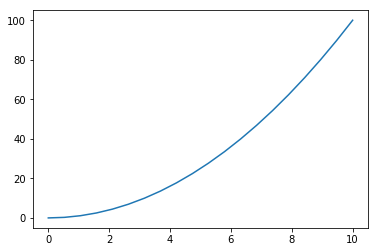

In [54]:
x=np.linspace(0,10,20)
y=x**2
plt.plot(x,y)

Text(0,0.5,'Y label')

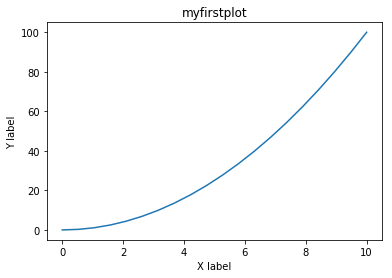

In [55]:
plt.plot(x,y)
plt.title('myfirstplot')
plt.xlabel('X label')
plt.ylabel('Y label')

Imagine we needed more than one plot on that canvas. Matplotlib allows us easily create multi-plots on the same figure using the .subplot() method. This .subplot() method takes in three parameters, namely:

nrows: the number of rows the Figure should have.
ncols: the number of columns the Figure should have.
plot_number : which refers to a specific plot in the Figure.
Using .subplot() we will create a two plots on the same canvas:


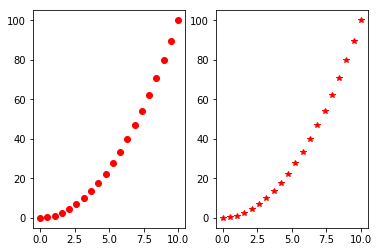

In [56]:
plt.subplot(1,2,1) # subplot with 1 row and 2 columns and plot number 1
plt.plot(x,y,'or')
plt.subplot(1,2,2) # subplot with 1 row and 2 columns and plot number 2
plt.plot(x,y,'*r')

2. Object oriented Interface: This is the best way to create plots. The idea here is to create Figure objects and call methods off it. Let’s create a blank Figure using the .figure() method.


In [57]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

Now we need to add a set of axes to it using the .add_axes() method. The add_axes() method takes in a list of four arguments (left, bottom, width, and height — which are the positions where the axes should be placed) ranging from 0 to 1. Here’s an example:



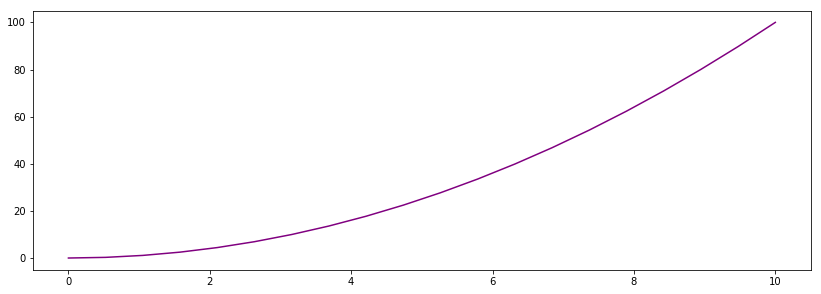

In [58]:
fig=plt.figure()
ax=fig.add_axes([0.1,0.6,1.8,0.9])
ax.plot(x,y,'purple')

We can further add x and y labels and a title to our plot same way we did in the Function approach, but there’s a slight difference here. Using .set_xlabel(), .set_ylabel() and .set_title() let us go ahead and add labels and a title to our plot:

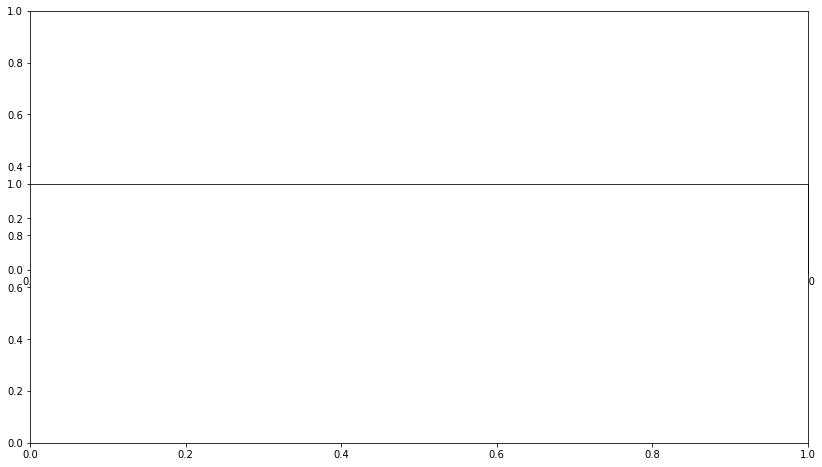

In [59]:
fig=plt.figure()
ax1=fig.add_axes([0.1,0.6,1.8,0.9])
ax2=fig.add_axes([0.1,0.,1.8,0.9])

In [60]:
#plot.patches.Rectangle(xy, width, height, angle=0.0, **kwargs)[source]

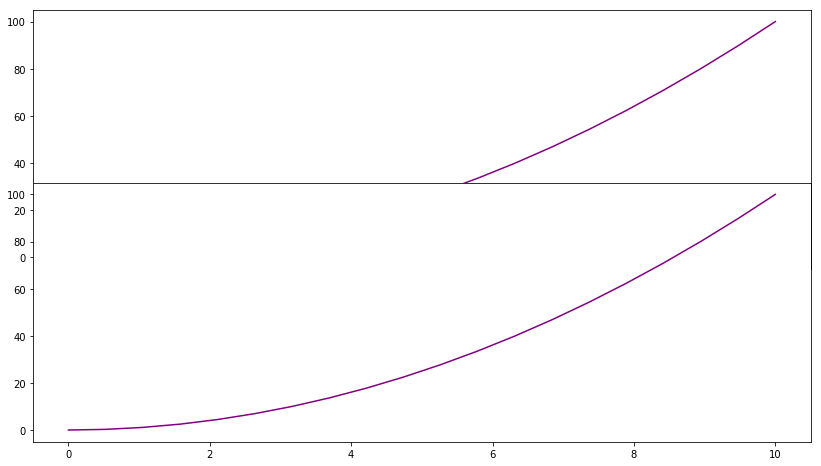

In [61]:
fig=plt.figure()
ax1=fig.add_axes([0.1,0.6,1.8,0.9])
ax2=fig.add_axes([0.1,0.,1.8,0.9])
ax1.plot(x,y,'purple')
ax2.plot(x,y,'purple')

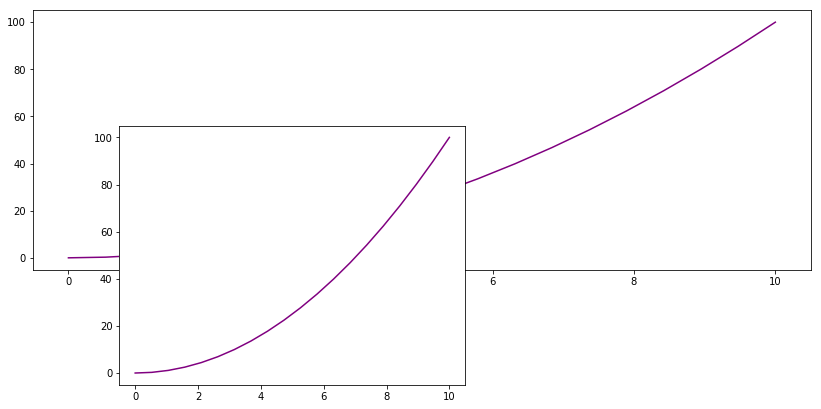

In [62]:
fig=plt.figure()
ax1=fig.add_axes([0.1,0.6,1.8,0.9])
ax2=fig.add_axes([0.3,0.2,0.8,0.9])
ax1.plot(x,y,'purple')
ax2.plot(x,y,'purple')

Quick Exercise: Now that we have our plot ready, see if you can set the title, the x and y labels for both axes.
Like we did in the functional approach, we can also create multiple plots in the object-oriented approach using the .subplots() method, and NOT .subplot(). The .subplots() method takes in nrows, which is the number of rows the Figure should have, and ncols, the number of columns the Figure should have.

For example, we can create a 3 by 3 subplots like this:

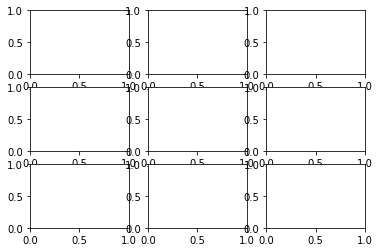

In [63]:
fig,axes=plt.subplots(nrows=3,ncols=3)

What we have just done is that we used tuple unpacking to grab the axes from the Figure object which gave us a 3 by 3 subplots. As we see, there is an issue of overlapping in the subplots we created. We can deal with that by using .tight_layout() method to space it out:

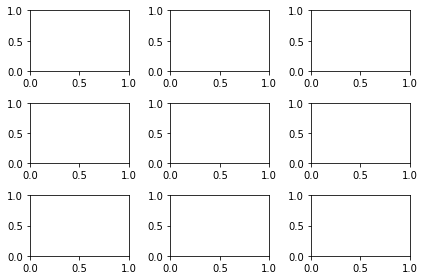

In [64]:
fig,axes=plt.subplots(nrows=3,ncols=3)
plt.tight_layout()

The only difference between plt.figure() and plt.subplots() is that plt.subplots() automatically does what the .add_axes() method of .figure() will do for you based off the number of rows and columns you specify.

Now that we know how to create subplots, let’s see how we can plot our x and y arrays on them. We want to plot x, y on the axes at index position (0,1) and y, x on the axes at position (1,2) respectively:



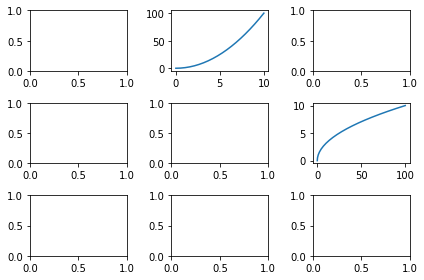

In [66]:
fig,ax=plt.subplots(nrows=3,ncols=3)
ax[0,1].plot(x,y)
ax[1,2].plot(y,x)
plt.tight_layout()

Quick Exercise: Go ahead and see if you can set the title and the x and y labels for both axes.

Figure size, aspect ratio, and DPI
Matplotlib allows us create customized plots by specifying the figure size, aspect ratio, and DPI by simply specifying the figsize and dpi arguments. The figsize is a tuple of the width and height of the figure (in inches), and dpi is the dots-per-inch (pixel-per-inch).

In the previous examples, we didn’t specify the figsize and dpi, so Matplotlib assumed their default values. Now, let’s go ahead and specify that we want a figure having width=8, height=2, and dpi=100.

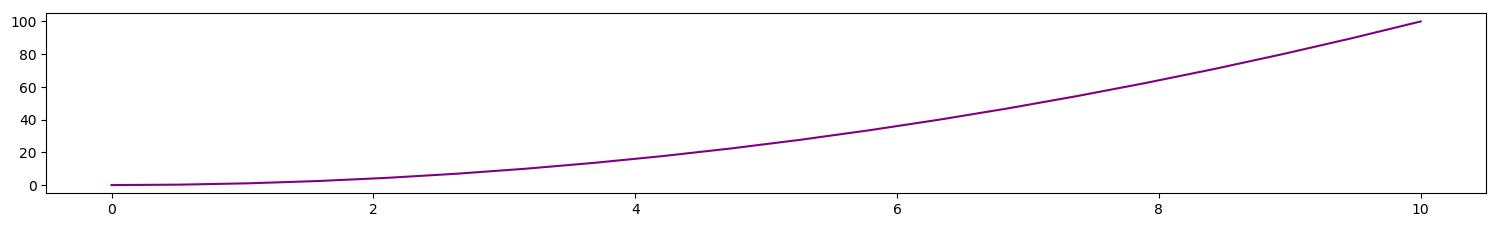

In [68]:
fig=plt.figure(figsize=(8,2),dpi=100)
ax1=fig.add_axes([0.1,0.6,1.8,0.9])
#ax2=fig.add_axes([0.3,0.2,0.8,0.9])
ax1.plot(x,y,'purple')
#ax2.plot(x,y,'purple')

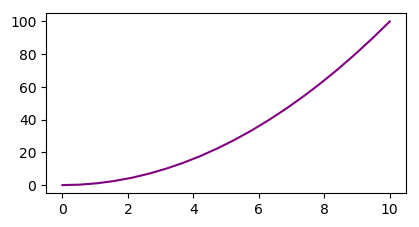

In [73]:
fig=plt.figure(figsize=(2,2),dpi=100)
ax1=fig.add_axes([0.1,0.6,1.8,0.9])
#ax2=fig.add_axes([0.3,0.2,0.8,0.9])
ax1.plot(x,y,'purple')
#ax2.plot(x,y,'purple')

We can do the same thing with subplots() like this:

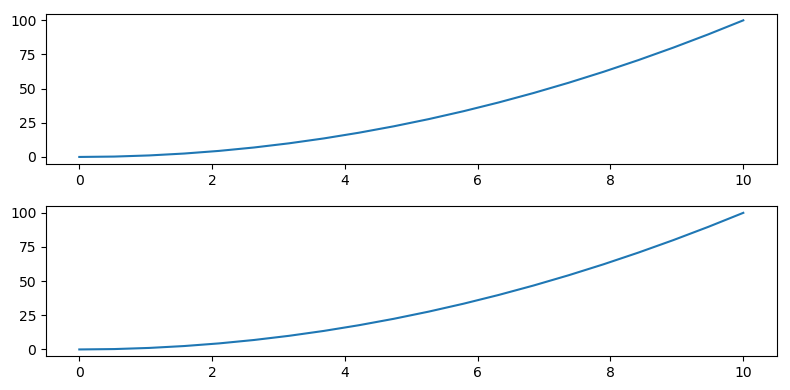

In [76]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(8,4),dpi=100)
ax[0].plot(x,y)
ax[1].plot(x,y)
plt.tight_layout()

Now that we have learned how to create plots, let’s learn how to save them for future use.

Legends
Legends allows us to distinguish between plots. With Legends, you can use label texts to identify or differentiate one plot from another. For example, say we have a figure having two plots like below:

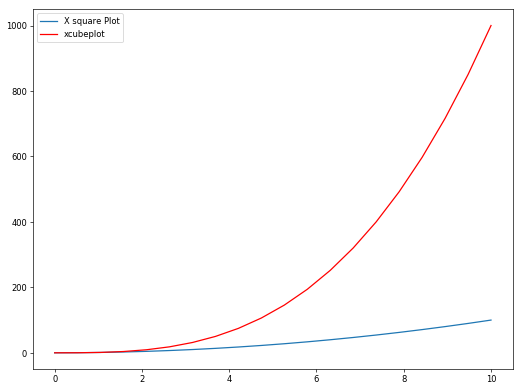

In [80]:
fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1])
ax.plot(x,x**2,label="X square Plot")
ax.plot(x,x**3,'red',label='xcubeplot')
ax.legend()

Plot range
Matplotlib allows us to set limits for our plots. We can easily configure the range of our plots using the set_ylim and set_xlim methods of the axis object, or axis(‘tight’) to automatically get “tightly fitted” axes ranges. For example, we can choose to show only plots between 0 to 1 of the x axis, and 0 to 5 of the y axis:

(0, 5)

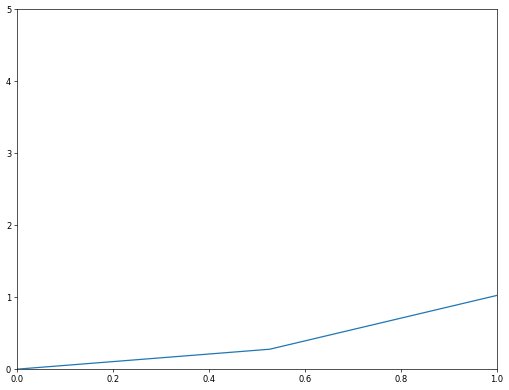

In [83]:
fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1])
ax.plot(x,x**2,label="X square Plot")
#ax.plot(x,x**3,'red',label='xcubeplot')
ax.set_xlim([0,1]) #[0,1] signifies the lower bound and upper bound of x-axis
ax.set_ylim([0,5]) #[0,5] signifies the lower bound and upper bound of y-axis


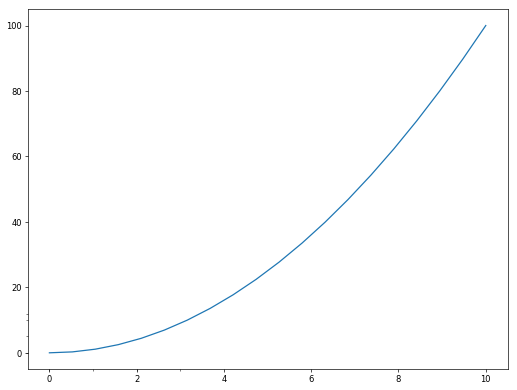

In [90]:
fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1])
ax.plot(x,x**2,label="X square Plot")
ax.set_xticks([0,1,2,3],minor=True)
ax.set_yticks([0,5,10,12],minor=True)
#ax.set_xlim([0,1,2,3]) #[0,1] signifies the lower bound and upper bound of x-axis
#ax.set_ylim([0,5,10,12]) #[0,5] signifies the lower bound and upper bound of y-axis


In [94]:
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

to set the labels as we want with xticks 

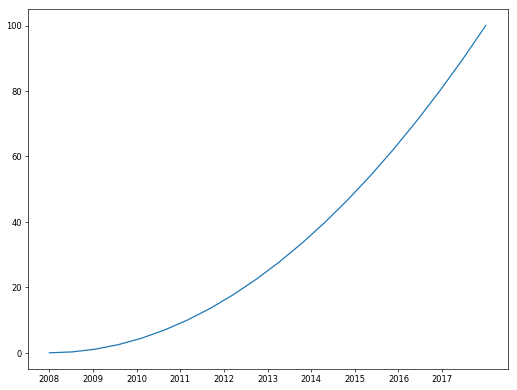

In [95]:
fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1])
ax.set(xticks=np.arange(0,10,1), xticklabels=[2008, 2009, 2010, 2011, 2012, 2013,2014, 2015, 2016,2017])
ax.plot(x,x**2,label="X square Plot")

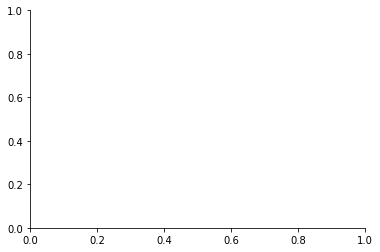

In [96]:
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))